In [59]:
import pandas as pd


In [20]:
df = pd.read_csv('/content/varanasi_gi_toy_cluster_survey.csv')
df.head()

,Household_ID,Family_Size,Monthly_Income,Is_GI_Beneficiary,Primary_Earner_Gender,Raw_Material_Access,Training_Access,Satisfaction_Score
0,1,9,4748.0,1,Male,Difficult,1,2
1,2,6,5766.0,1,Male,Easy,0,4
2,3,7,9772.0,1,Male,Moderate,1,3
3,4,9,NaN,1,Male,Moderate,1,4
4,5,5,9452.0,1,Female,Easy,0,1


In [21]:
df.isnull().sum()

,0
Household_ID,0
Family_Size,0
Monthly_Income,12
Is_GI_Beneficiary,0
Primary_Earner_Gender,0
Raw_Material_Access,0
Training_Access,0
Satisfaction_Score,0


In [22]:
from sklearn.impute import SimpleImputer

In [23]:
sim_imp = SimpleImputer(strategy='mean')
df_sim = df.copy()
df_sim['Monthly_Income'] = sim_imp.fit_transform(df[['Monthly_Income']])

In [24]:
from sklearn.impute import  KNNImputer
knn_imp = KNNImputer(n_neighbors=5)
df_knn = df.copy()
df_knn[['Monthly_Income']] = knn_imp.fit_transform(df[['Monthly_Income']])

In [25]:
import matplotlib.pyplot as plt


In [26]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [27]:
import seaborn as sns

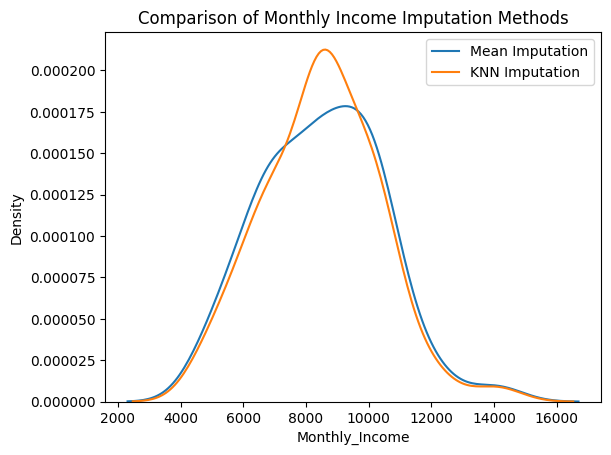

In [30]:
sns.kdeplot(df_simple['Monthly_Income'], label='Mean Imputation')
sns.kdeplot(df_knn['Monthly_Income'], label='KNN Imputation')
plt.legend()
plt.title('Comparison of Monthly Income Imputation Methods')
plt.show()

In [31]:
df = df_knn


In [32]:
from sklearn.preprocessing import LabelEncoder


In [33]:
le = LabelEncoder()
df['Primary_Earner_Gender'] = le.fit_transform(df['Primary_Earner_Gender'])
df['Raw_Material_Access'] = le.fit_transform(df['Raw_Material_Access'])

In [36]:
import numpy as np

In [37]:
df['Income_Level'] = pd.cut(df['Monthly_Income'], bins=[0, 5000, 10000, 15000, np.inf],
                            labels=['Low', 'Medium', 'High', 'Very High'])


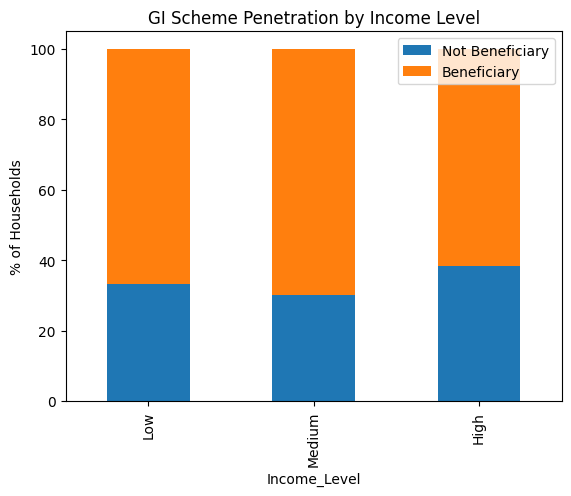

In [40]:
income_gi = pd.crosstab(df['Income_Level'], df['Is_GI_Beneficiary'], normalize='index') * 100
income_gi.plot(kind='bar', stacked=True)
plt.ylabel('% of Households')
plt.title('GI Scheme Penetration by Income Level')
plt.xticks(rotation=90)
plt.legend(['Not Beneficiary', 'Beneficiary'])
plt.show()

In [41]:
support_gap = 100 - income_gi.loc['Low', 1]

In [49]:
print(f" GI Support Gap in Low-Income Households: {support_gap:.2f}%")


 GI Support Gap in Low-Income Households: 33.33%


In [54]:
X = df[['Family_Size', 'Monthly_Income', 'Primary_Earner_Gender',
            'Raw_Material_Access', 'Training_Access', 'Satisfaction_Score']]
y = df['Is_GI_Beneficiary']

In [56]:
from sklearn.ensemble import RandomForestClassifier


In [57]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
y_pred = model.predict(X)


In [61]:
print("\n🎯 Model Evaluation:")
print(classification_report(y, y_pred))


🎯 Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        81

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



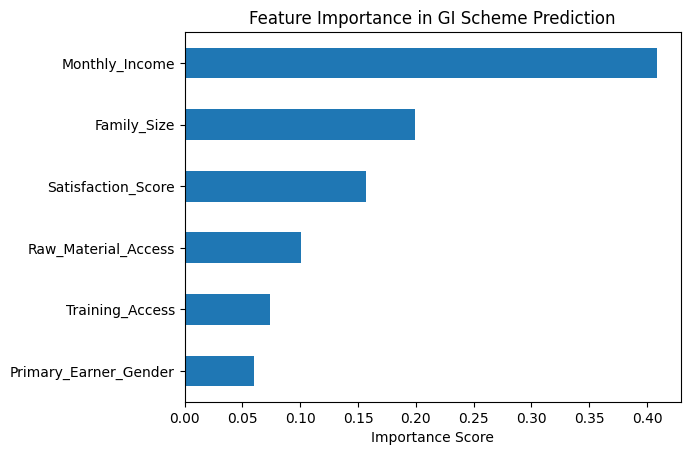

In [66]:
imp= pd.Series(model.feature_importances_, index=features)
imp.sort_values().plot(kind='barh')
plt.title('Feature Importance in GI Scheme Prediction')
plt.xlabel('Importance Score')
plt.show()
